In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
df['dropoff_longitude'].fillna(value= df['dropoff_longitude'].median(), inplace = True)
df['dropoff_latitude'].fillna(value= df['dropoff_latitude'].mean(), inplace = True)

<ipython-input-9-3ab76b65f3e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(value= df['dropoff_longitude'].median(), inplace = True)
<ipython-input-9-3ab76b65f3e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [ ]:
df.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [ ]:
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['dayofweek'] = df.pickup_datetime.dt.dayofweek
df['hour'] = df.pickup_datetime.dt.hour

In [ ]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,2015,5,2,14


In [ ]:
from math import *
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist= []
    for pos in range(len(longitude1)):
        long1,lat1,long2,lat2= map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long= long2- long1
        dist_lat= lat2- lat1
        a= sin(dist_lat/2)**2 + cos(lat1) * cos(lat2) * sin(dist_long/2)**2
        c= 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
    return travel_dist

In [ ]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                          df['pickup_latitude'].to_numpy(),
                                          df['dropoff_longitude'].to_numpy(),
                                          df['dropoff_latitude'].to_numpy() )

In [ ]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


In [ ]:
df = df.drop('pickup_datetime', axis=1)

In [ ]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450


,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
year,"Axes(0.125,0.448049;0.352273x0.0939024)"
month,"Axes(0.547727,0.448049;0.352273x0.0939024)"
dayofweek,"Axes(0.125,0.335366;0.352273x0.0939024)"
hour,"Axes(0.547727,0.335366;0.352273x0.0939024)"


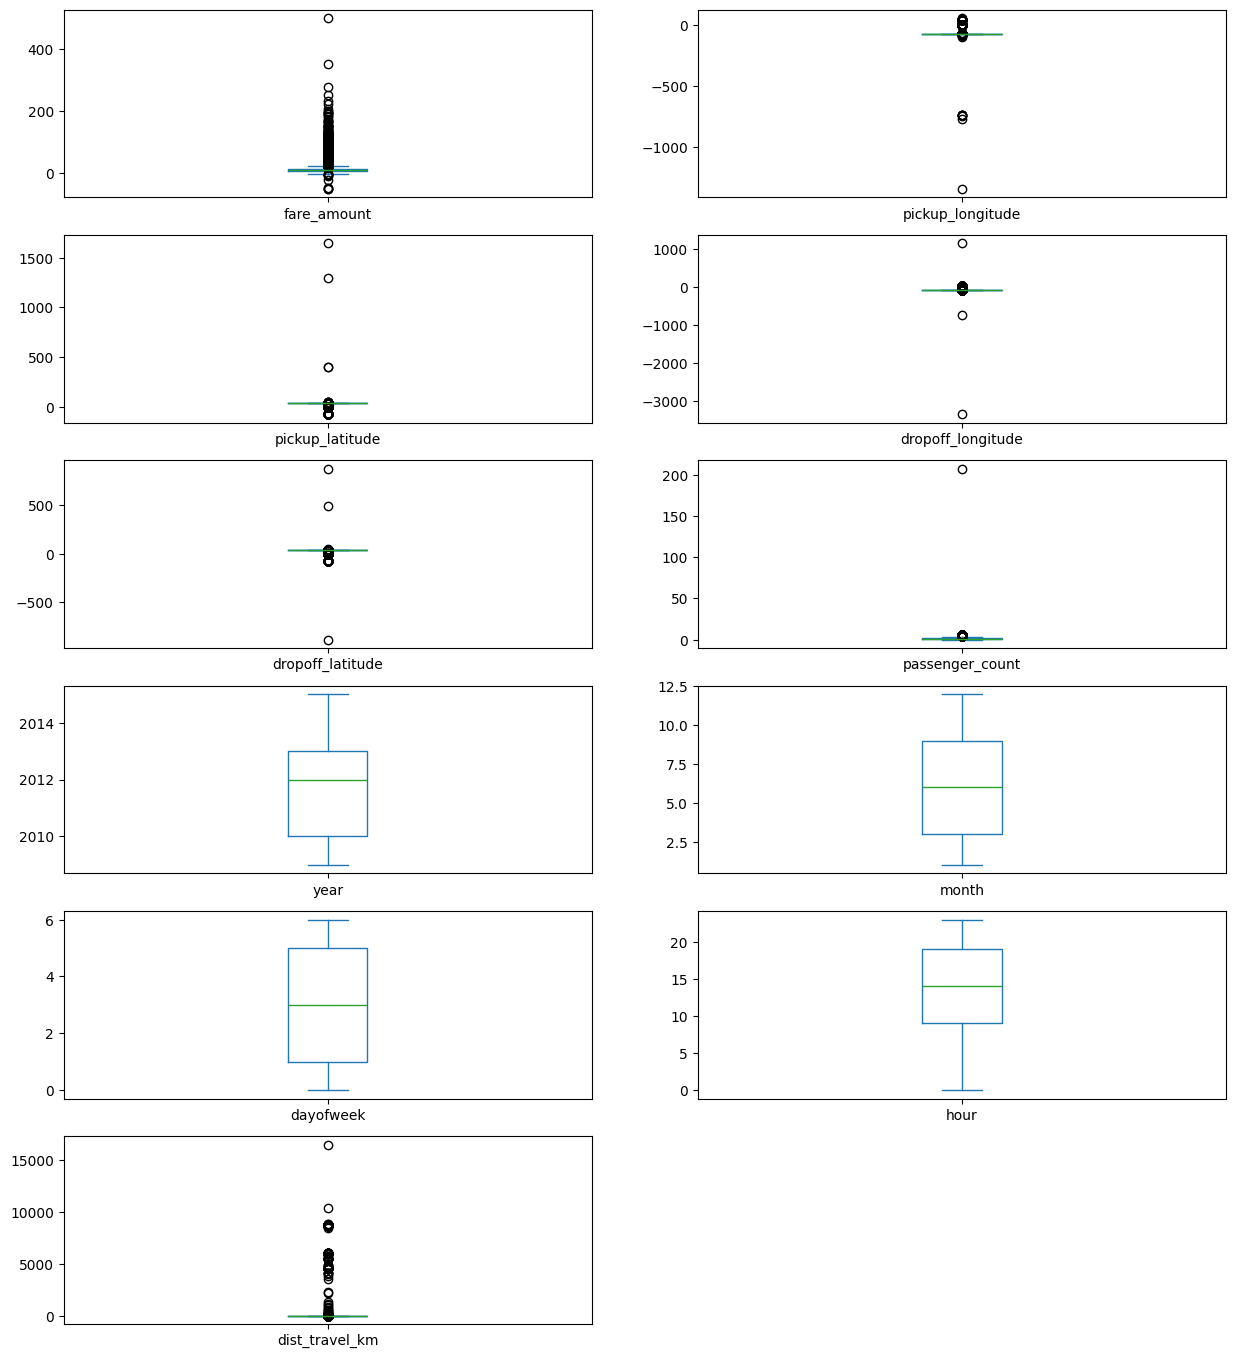

In [ ]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [ ]:
def remove_outlier(df1, col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    interQuantileRange = Q3 - Q1
    lowerLimit = Q1 - 1.5*interQuantileRange
    upperLimit = Q3 + 1.5*interQuantileRange
    df[col] = np.clip(df1[col], lowerLimit, upperLimit)
    return df1

def treat_all_outliers(df1, col_list):
    for c in col_list:
        df1 = remove_outlier(df, c)
    return df1

df = treat_all_outliers(df, df.iloc[: , 0::])

,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
year,"Axes(0.125,0.448049;0.352273x0.0939024)"
month,"Axes(0.547727,0.448049;0.352273x0.0939024)"
dayofweek,"Axes(0.125,0.335366;0.352273x0.0939024)"
hour,"Axes(0.547727,0.335366;0.352273x0.0939024)"


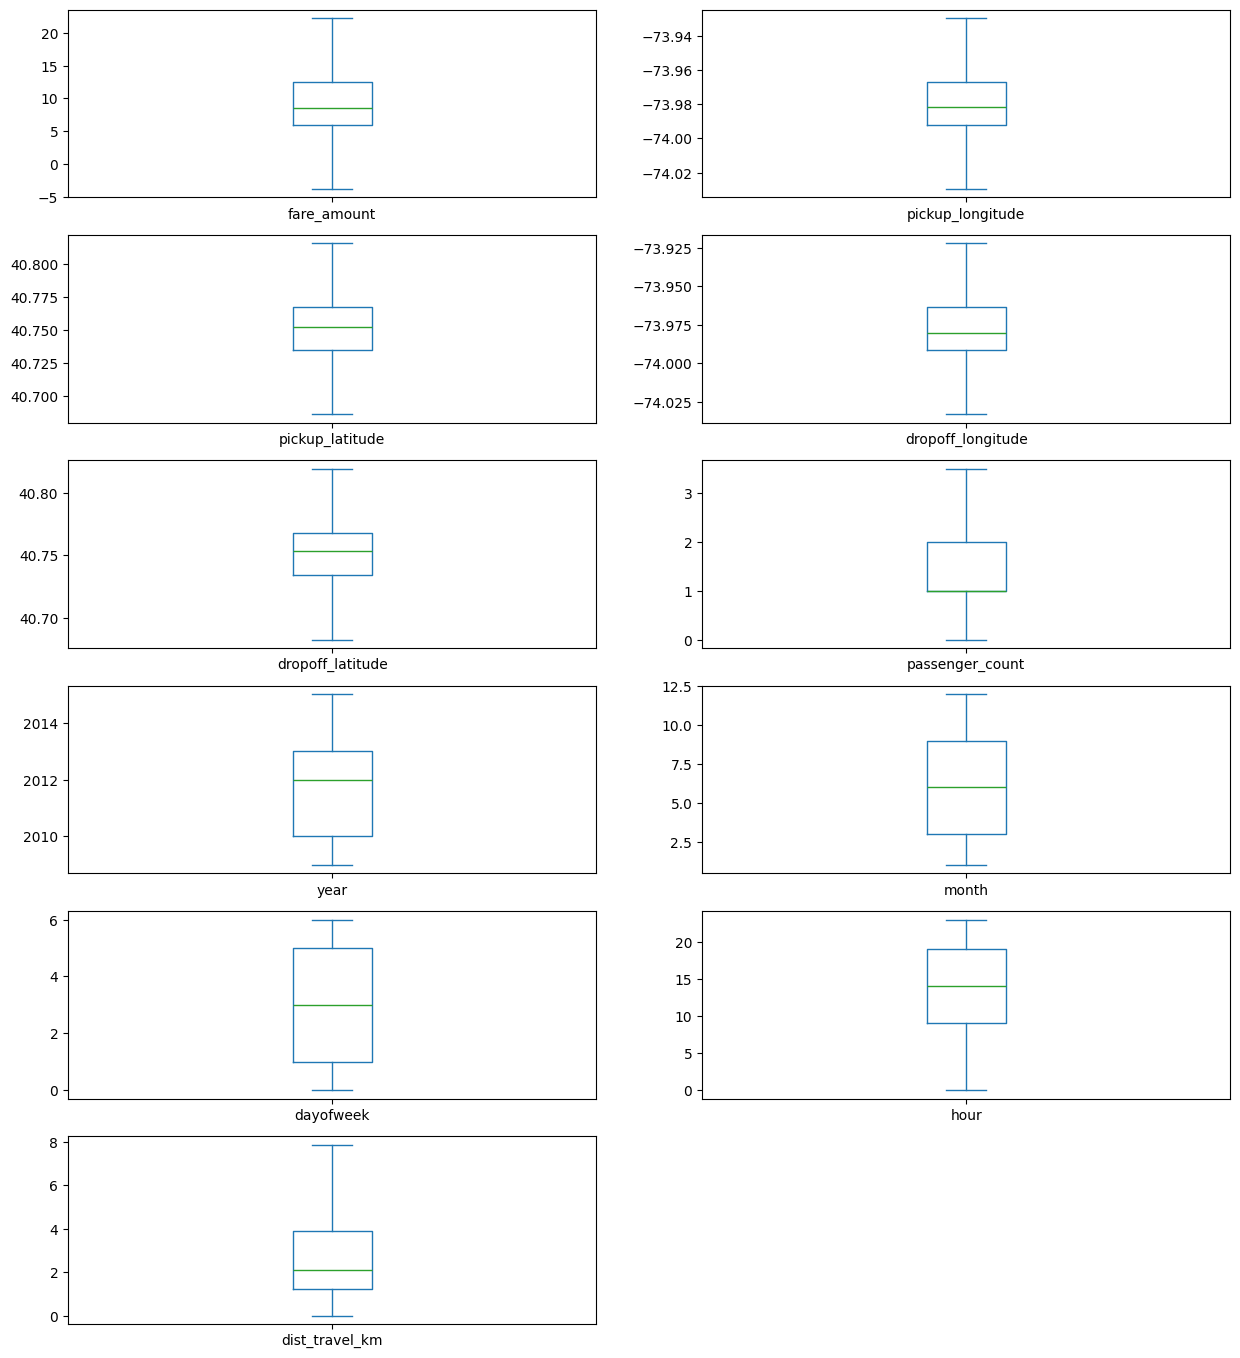

In [ ]:
df.plot(kind="box", subplots=True, layout = (7,2), figsize= (15,20))

In [ ]:
df= df.loc[(df.dist_travel_km>= 1) | (df.dist_travel_km<= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 11)


In [ ]:
incorrect_coordinates= df.loc[(df.pickup_latitude> 90) |(df.pickup_latitude< -90) |
                              (df.dropoff_latitude> 90) |(df.dropoff_latitude< -90) |
                              (df.pickup_longitude> 180) |(df.pickup_longitude< -180) |
                              (df.dropoff_longitude> 180) |(df.dropoff_longitude< -180) ]

df.drop(incorrect_coordinates, inplace = True, errors='ignore')

In [ ]:
df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,5,3,19,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,7,4,20,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,8,0,21,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,6,4,8,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,2014,8,3,17,4.475450


In [ ]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,dayofweek,hour,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,0.141277,0.030817,0.013652,-0.023623,0.844374
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.010198,0.001169,-0.024652,0.011579,0.098094
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,-0.014243,0.001562,-0.042310,0.029681,-0.046812
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,0.011346,0.002391,-0.003336,-0.046558,0.186531
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,-0.009603,-0.001193,-0.031919,0.019783,-0.038900
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,-0.009749,0.010351,0.048550,0.020274,0.009709
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,1.000000,-0.115859,0.006113,0.002156,0.024278
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.115859,1.000000,-0.008786,-0.003926,0.011628
dayofweek,0.013652,-0.024652,-0.042310,-0.003336,-0.031919,0.048550,0.006113,-0.008786,1.000000,-0.086947,0.027053
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,0.002156,-0.003926,-0.086947,1.000000,-0.038366


<Axes: >

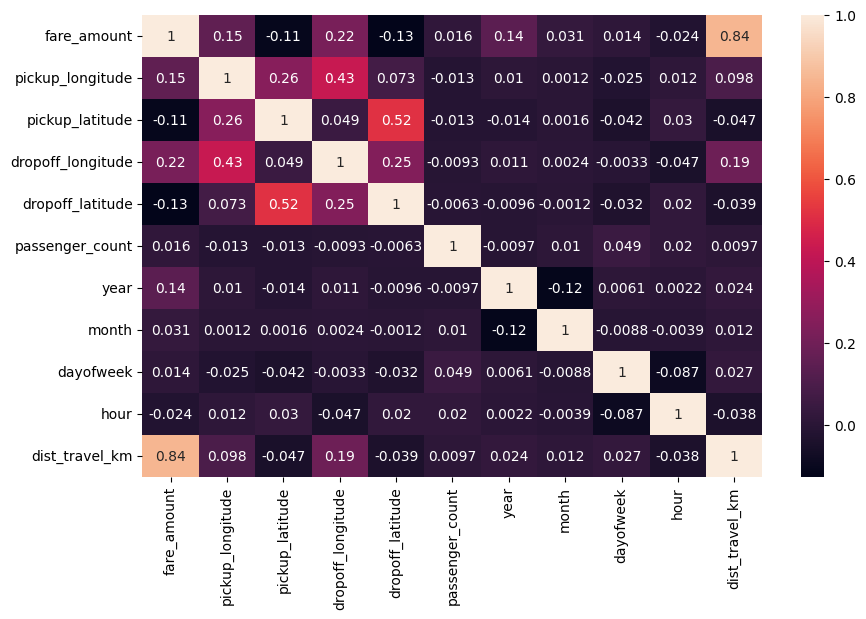

In [ ]:
fig,axis= plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(),annot= True)

In [ ]:
x= df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = regression.predict(X_test)
print(y_pred)

[ 5.45873977 11.17213788 10.64265588 ... 11.00442528  5.45786094
  5.62748212]


In [ ]:
y_test

,fare_amount
180481,4.5
8971,15.0
77027,12.1
21656,14.1
58303,10.9
...,...
40504,15.5
74283,18.0
89338,8.9
87953,5.3


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2_score(y_test,y_pred)

0.7452338798020003

In [ ]:
MSE= mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE)
RMSE

2.7510885736540756

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [ ]:
r2_score(y_test,ridge_pred)

0.7452271546637526

In [ ]:
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [ ]:
r2_score(y_test, lasso_pred)

0.7066547032102545

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


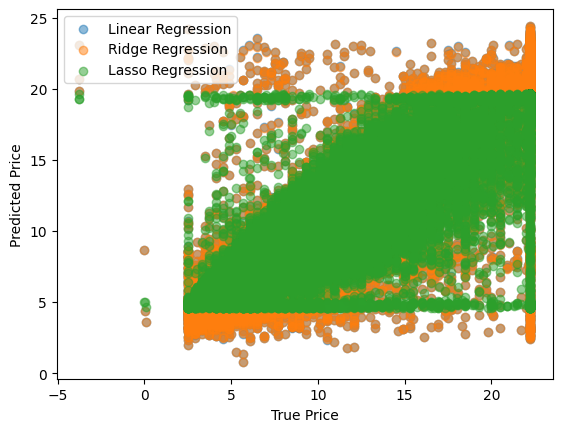

In [41]:
plt.scatter(y_test, y_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_pred, label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_pred, label='Lasso Regression', alpha=0.5)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()